<a href="https://colab.research.google.com/github/amomx/SIP-projects/blob/master/Clasificacion_imagenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación de Imágenes (fresa vs frambruesa)

## Ejercicio 1: Construyendo una Convnet desde cero

En este ejercicio, construiremos un modelo de clasificador desde cero que sea capaz de distinguir fresas de las frambuesas. Seguiremos estos pasos:

1. Explorar los datos 
2. Construir un convnet desde cero para resolver nuestro problema de clasificación
3. Evaluar la precisión del entrenamiento y la validación.


## Explorar los datos de ejemplo


Comencemos descargando nuestros datos de ejemplo, un .zip de 1,312 imágenes JPG de fresas y frambuesas, y extrayéndolo localmente en `/ tmp`.

**NOTA:** Las imágenes utilizadas en este ejercicio se han extraído del ["Fruits 360 dataset"](https://www.kaggle.com/moltean/fruits#fruits-360_dataset.zip) disponible en Kaggle, que contiene 77917 imágenes de diversas frutas y verduras. Aquí, usamos un subconjunto del conjunto de datos completo para disminuir el tiempo de capacitación con fines educativos, se utlizan solo imágenes de fresas y frambuesas. 





In [ ]:
!wget --no-check-certificate \
    https://github.com/Horea94/Fruit-Images-Dataset/archive/master.zip \
    -O /tmp/master.zip

--2021-01-30 00:14:27--  https://github.com/Horea94/Fruit-Images-Dataset/archive/master.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/Horea94/Fruit-Images-Dataset/zip/master [following]
--2021-01-30 00:14:28--  https://codeload.github.com/Horea94/Fruit-Images-Dataset/zip/master
Resolving codeload.github.com (codeload.github.com)... 140.82.112.10
Connecting to codeload.github.com (codeload.github.com)|140.82.112.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘/tmp/master.zip’

/tmp/master.zip         [                <=> ] 761.30M  27.2MB/s    in 33s     

2021-01-30 00:15:01 (23.2 MB/s) - ‘/tmp/master.zip’ saved [798281939]



In [ ]:
import os
import zipfile
import shutil

local_zip = '/tmp/master.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
lista = os.listdir('/tmp/Fruit-Images-Dataset-master/')
print (lista)

shutil.copytree('/tmp/Fruit-Images-Dataset-master/Training/Strawberry','/tmp/Fruit-Images-Dataset-master/Train/Strawberry')
shutil.copytree('/tmp/Fruit-Images-Dataset-master/Test/Strawberry','/tmp/Fruit-Images-Dataset-master/Testing/Strawberry')


shutil.copytree('/tmp/Fruit-Images-Dataset-master/Training/Raspberry','/tmp/Fruit-Images-Dataset-master/Train/Raspberry')
shutil.copytree('/tmp/Fruit-Images-Dataset-master/Test/Raspberry','/tmp/Fruit-Images-Dataset-master/Testing/Raspberry')



['LICENSE', 'papers', 'readme.md', 'src', 'Test', 'Training', 'test-multiple_fruits']


'/tmp/Fruit-Images-Dataset-master/Testing/Raspberry'

In [ ]:
lista = os.listdir('/tmp/Fruit-Images-Dataset-master/')
print (lista)

['LICENSE', 'papers', 'readme.md', 'Train', 'src', 'Test', 'Training', 'Testing', 'test-multiple_fruits']


In [ ]:
lis = os.listdir('/tmp/Fruit-Images-Dataset-master/Train/Strawberry')
print (lis[:10])
listas = os.listdir('/tmp/Fruit-Images-Dataset-master/Train/Raspberry')
listas.sort()
print (listas[:10])




['294_100.jpg', 'r_249_100.jpg', '276_100.jpg', '176_100.jpg', '171_100.jpg', 'r_238_100.jpg', '145_100.jpg', '213_100.jpg', '129_100.jpg', '115_100.jpg']
['0_100.jpg', '10_100.jpg', '113_100.jpg', '114_100.jpg', '115_100.jpg', '116_100.jpg', '117_100.jpg', '118_100.jpg', '119_100.jpg', '11_100.jpg']


Los contenidos de .zip se extraen al directorio base `/ tmp / master`, que contiene varios subdirectorios, en ellos buscar los ` train` y `validation` para los conjuntos de datos de capacitación y validación, que a su vez contienen subdirectorios "strawberry" y "raspberry". Vamos a definir cada uno de estos directorios:

In [ ]:
base_dir = '/tmp/Fruit-Images-Dataset-master'

train_dir = os.path.join(base_dir, 'Train')
validation_dir = os.path.join(base_dir, 'Testing')

# Directorio con nuestras fotos de fresas de entrenamiento.
train_strawberry_dir = os.path.join (train_dir, 'Strawberry')

# Directorio con nuestras fotos de frambuesas de entrenamiento.
train_raspberry_dir = os.path.join (train_dir, 'Raspberry')

# Directorio con nuestras imágenes de fresas de validación.
validation_strawberry_dir = os.path.join (validation_dir, 'Strawberry')

# Directorio con nuestras fotos de frambuesas de validación.
validation_raspberry_dir = os.path.join (validation_dir, 'Raspberry')


print("listo")




listo


Ahora, veamos cómo se ven los nombres de archivo en los directorios `fresas` y ` frambuesas` `train` (las convenciones de nombres de archivos son las mismas en el directorio ` Test`)

In [ ]:
train_strawberry_fnames = os.listdir(train_strawberry_dir)
print (train_strawberry_fnames[:10])

train_raspberry_fnames = os.listdir(train_raspberry_dir)
train_raspberry_fnames.sort()
print (train_raspberry_fnames[:10])



['294_100.jpg', 'r_249_100.jpg', '276_100.jpg', '176_100.jpg', '171_100.jpg', 'r_238_100.jpg', '145_100.jpg', '213_100.jpg', '129_100.jpg', '115_100.jpg']
['0_100.jpg', '10_100.jpg', '113_100.jpg', '114_100.jpg', '115_100.jpg', '116_100.jpg', '117_100.jpg', '118_100.jpg', '119_100.jpg', '11_100.jpg']


Averigüemos el número total de imágenes de fresas y frambuesas en los directorios `Train` y ` Validation`:

In [ ]:
print ('total imagenes de entrenamiento fresas:', len(os.listdir(train_strawberry_dir)))
print ('total imagenes de entrenamiento frambuesas:', len(os.listdir(train_raspberry_dir)))
print ('total imagenes de validacion fresas:', len(os.listdir(validation_strawberry_dir)))
print ('total imagenes de validacion frambuesas:', len(os.listdir(validation_raspberry_dir)))

total imagenes de entrenamiento fresas: 492
total imagenes de entrenamiento frambuesas: 490
total imagenes de validacion fresas: 164
total imagenes de validacion frambuesas: 166


Para fresas  tenemos 492 imágenes de entrenamiento y 164 imágenes de prueba.
Para frambuesas  tenemos 490 imágenes de entrenamiento y 166 imágenes de prueba.

Ahora echemos un vistazo a algunas fotos para tener una mejor idea de cómo se ven los conjuntos de datos de fresas y frambuesas. Primero, configure los parámetros matplot:

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parámetros para nuestra gráfica; Vamos a generar imágenes en una configuración 4x4.

nrows = 4
ncols = 4

# Índice para iterar sobre imágenes
pic_index = 0

print ("listo")

listo


Ahora, muestra un lote de 8 fotos de fresas y 8 frambuesas. Puede volver a ejecutar la celda para ver un lote nuevo cada vez:

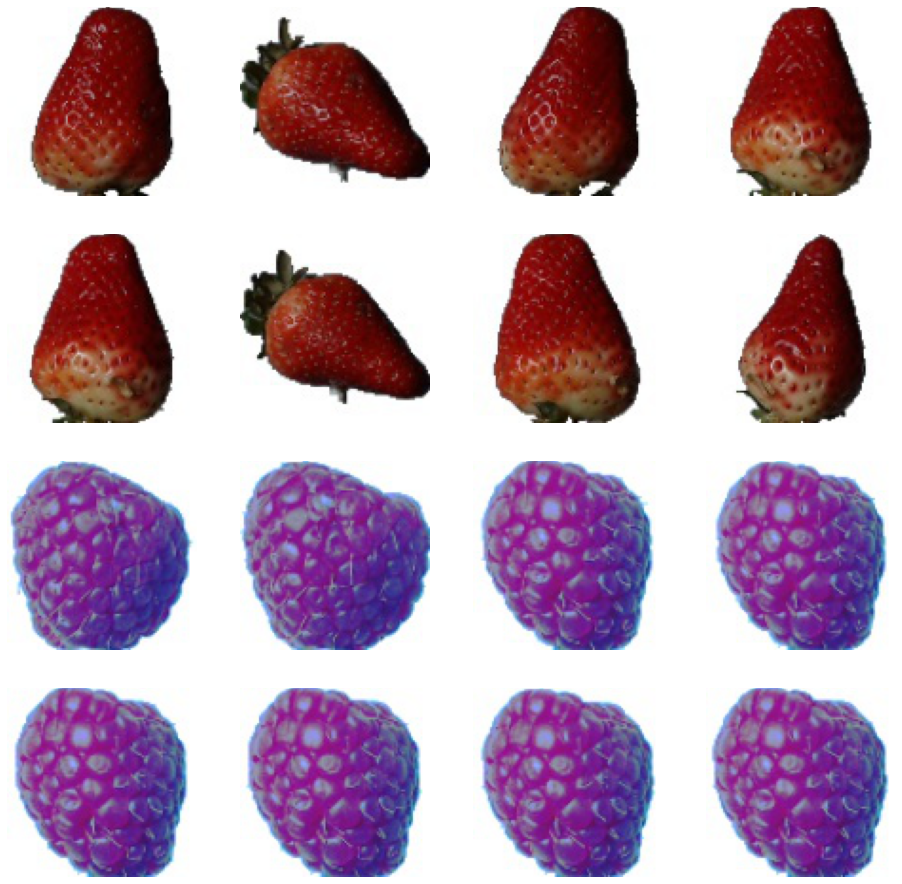

In [ ]:
# Configura matplotlib fig y tómala para que se ajuste a las fotos de 4x4
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_strawberry_pix = [os.path.join(train_strawberry_dir, fname) 
                for fname in train_strawberry_fnames[pic_index-8:pic_index]]
next_raspberry_pix = [os.path.join(train_raspberry_dir, fname) 
                for fname in train_raspberry_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_strawberry_pix+next_raspberry_pix):
  # Configurar subplot; los índices de subtrama comienzan en 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')  # No mostrar ejes (o cuadrícula)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## Construyendo una pequeño Convnet desde cero y ver que precisión obtenemos

Las imágenes que se incluirán en nuestro convnet son imágenes en color de 150x150 (en la siguiente sección sobre Preprocesamiento de datos, agregaremos el manejo para cambiar el tamaño de todas las imágenes a 150x150 antes de enviarlas a la red neuronal).

Vamos a codificar la arquitectura. Apilaremos 3 módulos {convolution + relu + maxpooling}. Nuestras circunvoluciones funcionan en ventanas de 3x3 y nuestras capas de agrupación máxima operan en ventanas de 2x2. Nuestra primera convolución extrae 16 filtros, la siguiente extrae 32 filtros y la última extrae 64 filtros.

**NOTA**: esta es una configuración que se usa ampliamente y se sabe que funciona bien para la clasificación de imágenes. Además, dado que tenemos relativamente pocos ejemplos de capacitación (460 y 462), el uso de solo tres módulos convolucionales mantiene el modelo pequeño


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model
print ("listo")

listo


In [ ]:
# Nuestro mapa de características de entrada es 150x150x3: 150x150 para los píxeles de la imagen, y 3 para
# los tres canales de color: R, G y B
img_input = layers.Input(shape=(150, 150, 3))

# La primera convolución extrae 16 filtros que son 3x3.
# A la convolución le sigue la capa de agrupación máxima con una ventana de 2x2
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# La segunda convolución extrae 32 filtros que son 3x3.
# A la convolución le sigue la capa de agrupación máxima con una ventana de 2x2
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# La segunda convolución extrae 32 filtros que son 3x3.
# A la convolución le sigue la capa de agrupación máxima con una ventana de 2x2ow
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

Encima de esto pegamos dos capas completamente conectadas. Debido a que estamos enfrentando un problema de clasificación de dos clases, es decir, un * problema de clasificación binaria *, terminaremos nuestra red con una activación sigmoide, de modo que la salida de nuestra red será un único escalar entre 0 y 1, que codificará la probabilidad de que la imagen actual sea de clase 1 (a diferencia de la clase 0).


In [ ]:
# Acoplar el mapa de características a un tensor de 1 dim para que podamos agregar capas completamente conectadas
x = layers.Flatten()(x)

# Crea una capa totalmente conectada con activación ReLU y 512 unidades ocultas
x = layers.Dense(512, activation='relu')(x)

# Crear capa de salida con un solo nodo y activación sigmoide
output = layers.Dense(1, activation='sigmoid')(x)

# Crear modelo:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer

model = Model(img_input, output)
print("listo")

listo


Resumamos la arquitectura del modelo:

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0     

La columna "forma de salida (Output Shape)" muestra cómo el tamaño de su mapa de características evoluciona en cada capa sucesiva. Las capas de convolución reducen el tamaño de los mapas de características un poco debido al relleno, y cada capa de agrupación reduce a la mitad el mapa de características.

A continuación, configuraremos las especificaciones para el entrenamiento modelo. Entrenaremos nuestro modelo con la pérdida `binary_crossentropy`, porque es un problema de clasificación binaria y nuestra activación final es un sigmoide. Usaremos el optimizador `rmsprop` con una tasa de aprendizaje de ` 0.001`. Durante el entrenamiento, vamos a querer monitorear la precisión de la clasificación.




In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

### Preprocesamiento de datos

Configuremos generadores de datos que leerán imágenes en nuestras carpetas de origen, las convertiremos a tensores `float32` y las alimentaremos (con sus etiquetas) a nuestra red. Tendremos un generador para las imágenes de entrenamiento y otro para las imágenes de validación. Nuestros generadores producirán lotes de 20 imágenes de tamaño 150x150 y sus etiquetas (binario).

Como ya sabrá, los datos que entran en las redes neuronales deberían normalizarse de alguna manera para que la red los pueda procesar mejor. (Es poco común introducir píxeles sin procesar en un convnet). En nuestro caso, preprocesaremos nuestras imágenes al normalizar los valores de los píxeles para que estén en el rango `[0, 1]` (originalmente todos los valores están en el nivel `[0, 255] ` rango).

En Keras esto se puede hacer a través de la clase `keras.preprocessing.image.ImageDataGenerator` usando el parámetro` rescale`. Esta clase `ImageDataGenerator` le permite instanciar generadores de lotes de imágenes aumentadas (y sus etiquetas) a través de` .flow (datos, etiquetas) `o` .flow_from_directory (directory) `. Estos generadores se pueden usar con los métodos del modelo Keras que aceptan generadores de datos como entradas: `fit_generator`,` evaluar_generator` y `predict_generator`.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Todas las imágenes serán reescaladas en 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Imágenes de entrenamiento de flujo en lotes de 20 usando train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,   # Este es el directorio fuente para entrenar imágenes
        target_size=(150, 150),  # Todas las imágenes se redimensionarán a 150x150
        batch_size=20,
        # Ya que usamos la pérdida binary_crossentropy, necesitamos etiquetas binarias
        class_mode='binary')

# Imágenes de validación de flujo en lotes de 20 usando el generador test_datagen
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 982 images belonging to 2 classes.
Found 330 images belonging to 2 classes.


###Entrenamiento
Entrenemos en las 982 imágenes disponibles, durante 15 épocas, y validemos en las 330 imágenes de prueba. (Esto puede tardar unos minutos en ejecutarse).

In [ ]:
# history = model.fit_generator(
#       train_generator,
#       steps_per_epoch=100,  # 982 images = batch_size * steps
#       epochs=15,
#       validation_data=validation_generator,
#       validation_steps=50,  # 330 images = batch_size * steps
#       verbose=2)

history = model.fit_generator(
      train_generator,
      steps_per_epoch=len(train_generator),  # 982 images = batch_size * steps
      epochs=15,
      validation_data=validation_generator,
      validation_steps=len(validation_generator),  # 330 images = batch_size * steps
      verbose=2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
50/50 - 26s - loss: 0.5215 - acc: 0.9399 - val_loss: 3.0882e-05 - val_acc: 1.0000
Epoch 2/15
50/50 - 25s - loss: 1.0192e-05 - acc: 1.0000 - val_loss: 6.5680e-07 - val_acc: 1.0000
Epoch 3/15
50/50 - 25s - loss: 2.6909e-07 - acc: 1.0000 - val_loss: 6.0235e-08 - val_acc: 1.0000
Epoch 4/15
50/50 - 24s - loss: 2.6763e-08 - acc: 1.0000 - val_loss: 8.8992e-09 - val_acc: 1.0000
Epoch 5/15
50/50 - 24s - loss: 5.0118e-09 - acc: 1.0000 - val_loss: 1.7319e-09 - val_acc: 1.0000
Epoch 6/15
50/50 - 24s - loss: 1.3629e-09 - acc: 1.0000 - val_loss: 3.9730e-10 - val_acc: 1.0000
Epoch 7/15
50/50 - 23s - loss: 6.2680e-10 - acc: 1.0000 - val_loss: 1.5656e-10 - val_acc: 1.0000
Epoch 8/15
50/50 - 23s - loss: 1.3653e-10 - acc: 1.0000 - val_loss: 3.3472e-11 - val_acc: 1.0000
Epoch 9/15
50/50 - 23s - loss: 2.3863e-10 - acc: 1.0000 - val_loss: 2.2709e-11 - val_acc: 1.0000
Epoch 10/15
50/50 - 23s - loss: 3.9316e-10 - acc: 1.0000 - val_loss: 2.1380e-11 - val_acc: 1.0000
Epoch 11/15
50/50 - 23s - loss: 5

### Visualizando Representaciones Intermedias

Para tener una idea de qué tipo de características ha aprendido nuestro convnet, una cosa divertida es visualizar cómo se transforma una entrada a medida que pasa por el convnet.

Seleccionemos una imagen de fresa o frambuesa al azar del conjunto de entrenamiento, y luego generemos una figura donde cada fila es la salida de una capa, y cada imagen en la fila es un filtro específico en ese mapa de características de salida. Vuelva a ejecutar esta celda para generar representaciones intermedias para una variedad de imágenes de entrenamiento

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


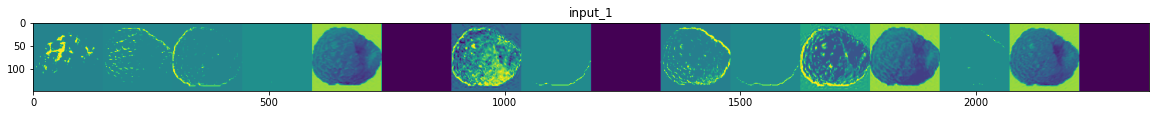

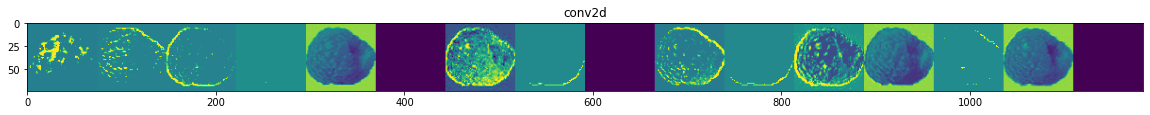

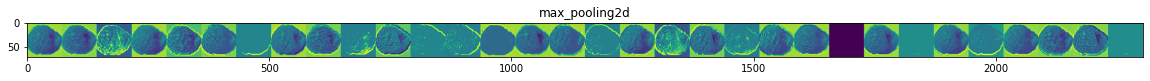

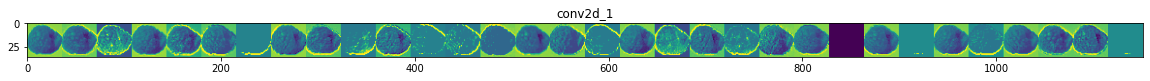

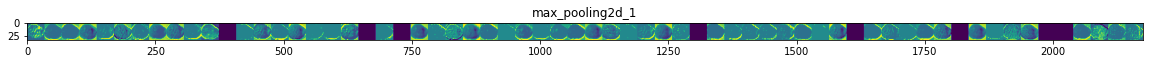

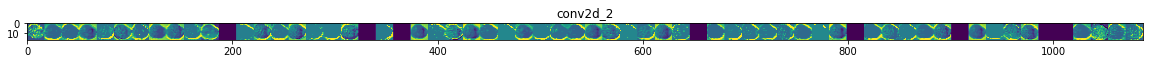

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Vamos a definir un nuevo modelo que tomará una imagen como entrada y emitirá
# representaciones intermedias para todas las capas en el modelo anterior después
# del primero.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)


# Preparemos una imagen de entrada aleatoria de una fresa o frambuesa del conjunto de entrenamiento.
strawberry_img_files = [os.path.join(train_strawberry_dir, f) for f in train_strawberry_fnames]
raspberry_img_files = [os.path.join(train_raspberry_dir, f) for f in train_raspberry_fnames]
img_path = random.choice(strawberry_img_files + raspberry_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescala por 1/255
x /= 255

# Revisemos nuestra imagen a través de nuestra red, obteniendo así todos
# representaciones intermedias para esta imagen.
successive_feature_maps = visualization_model.predict(x)

# Estos son los nombres de las capas, por lo que puede tenerlos como parte de nuestra trama
layer_names = [layer.name for layer in model.layers]

# Ahora vamos a mostrar nuestras representaciones
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    #Solo haga esto para las capas conv / maxpool, no para las capas completamente conectadas
    n_features = feature_map.shape[-1] # número de características en el mapa de características
    #El mapa de características tiene forma (1, tamaño, tamaño, n_características)     
    size = feature_map.shape[1]
    # Colocaremos nuestras imágenes en esta matriz.
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocese la característica para que sea visualmente agradable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # Colocaremos cada filtro en esta gran rejilla horizontal.
      display_grid[:, i * size : (i + 1) * size] = x
      # Mostrar la cuadrícula
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

Como puede ver, pasamos de los píxeles sin procesar de las imágenes a representaciones cada vez más abstractas y compactas. Las representaciones en sentido descendente comienzan destacando a qué presta atención la red, y muestran que cada vez se "activan" menos funciones; la mayoría se ponen a cero. Esto se llama "escasez". La representación dispersa es una característica clave del aprendizaje profundo.


Estas representaciones llevan cada vez menos información sobre los píxeles originales de la imagen, pero información cada vez más refinada sobre la clase de la imagen. Puede pensar en un convnet (o en una red profunda en general) como una tubería de destilación de información.

## Evaluación de la precisión y la pérdida para el modelo

Vamos a trazar la precisión / pérdida de entrenamiento / validación que se recogió durante el entrenamiento:


Text(0.5, 1.0, 'Pérdida de entrenamiento y validación.')

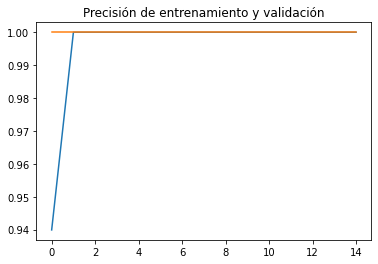

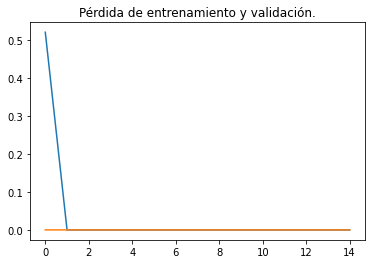

In [ ]:
# Recuperar una lista de resultados de precisión en los datos de entrenamiento y pruebas
# establecidas para cada época de entrenamiento
acc = history.history['acc']
val_acc = history.history['val_acc']

# Recupere una lista de los resultados de la lista de entrenamiento 
#y pruebas de conjuntos de datos para cada época de entrenamiento
loss = history.history['loss']
val_loss = history.history['val_loss']

# Obtener el número de épocas
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Precisión de entrenamiento y validación')

plt.figure()

# Trazado de plot y precisión de validación por época.
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Pérdida de entrenamiento y validación.')

Como puede ver, estamos en un **sobreajuste**. Nuestra precisión de entrenamiento (en azul) se acerca al 100% (!), Mientras que nuestra precisión de validación (en verde) se detiene en un 100%. 

Dado que tenemos un número relativamente pequeño de ejemplos de capacitación (980), el sobreajuste debe ser nuestra principal preocupación. El ajuste excesivo ocurre cuando un modelo expuesto a muy pocos ejemplos aprende patrones que no se generalizan a nuevos datos, es decir, cuando el modelo comienza a usar características irrelevantes para hacer predicciones. Por ejemplo, si usted, como humano, solo ve tres imágenes de personas que son leñadores, y tres imágenes de personas que son navegantes, y entre ellas la única persona que lleva una gorra es un leñador, puede comenzar a pensar que usar una gorra Es un signo de ser un leñador en lugar de un marinero. Entonces harías un clasificador de leñador / marinero pésimo.

El ajuste excesivo es el problema central en el aprendizaje automático: dado que estamos ajustando los parámetros de nuestro modelo a un conjunto de datos determinado, ¿cómo podemos asegurarnos de que las representaciones aprendidas por el modelo serán aplicables a los datos nunca antes vistos? ¿Cómo evitamos aprender cosas que son específicas de los datos de entrenamiento?
